## Binary Classification for Bike Sales

Algorithms implemented -
1. Naive Bayes Classifier
2. Decision Tree Classifier
3. Random Forest Classifier
4. XGBoost Classifier

# Dataset desciption

This dataset has the details of 1000 users from different backgrounds with no NA values and output variable as whether or not they buy a bike.

You can find the dataset [here](https://www.kaggle.com/heeraldedhia/bike-buyers?select=bike_buyers_clean.csv).

# Importing libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Importing the dataset


In [5]:
df = pd.read_csv(r'C:\Users\Yakov\Downloads\bikeBuyersClean.csv', sep=',')

# Data overview

In [6]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [7]:
df.shape

(1000, 13)

In [8]:
df.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Marital Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Purchased Bike    1000 non-null   object
dtypes: int64(5), object(8)
memory usage: 101.7+ KB


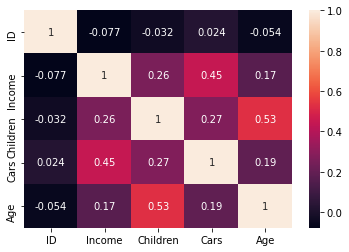

In [10]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Analyzing Numerical Variables

In [12]:
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 5 numerical variables
The numerical variables are : ['ID', 'Income', 'Children', 'Cars', 'Age']


In [13]:
df[numerical].head()


,ID,Income,Children,Cars,Age
0,12496,40000,1,0,42
1,24107,30000,3,1,43
2,14177,80000,5,2,60
3,24381,70000,0,1,41
4,25597,30000,0,0,36


In [14]:
# check missing values in numerical variables
df[numerical].isnull().sum()



ID          0
Income      0
Children    0
Cars        0
Age         0
dtype: int64

## Analyzing Categorical Variables

In [15]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 8 categorical variables
The categorical variables are : ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region', 'Purchased Bike']


In [16]:
df[categorical].head()

,Marital Status,Gender,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,Married,Female,Bachelors,Skilled Manual,Yes,0-1 Miles,Europe,No
1,Married,Male,Partial College,Clerical,Yes,0-1 Miles,Europe,No
2,Married,Male,Partial College,Professional,No,2-5 Miles,Europe,No
3,Single,Male,Bachelors,Professional,Yes,5-10 Miles,Pacific,Yes
4,Single,Male,Bachelors,Clerical,No,0-1 Miles,Europe,Yes


In [17]:
df[categorical].isnull().sum()

Marital Status      0
Gender              0
Education           0
Occupation          0
Home Owner          0
Commute Distance    0
Region              0
Purchased Bike      0
dtype: int64

In [18]:
# view frequency counts of values in categorical variables
for var in categorical: 
    print(df[var].value_counts())
    print(df[var].value_counts()/np.float(len(df)))
    print()

Married    539
Single     461
Name: Marital Status, dtype: int64
Married    0.539
Single     0.461
Name: Marital Status, dtype: float64

Male      509
Female    491
Name: Gender, dtype: int64
Male      0.509
Female    0.491
Name: Gender, dtype: float64

Bachelors              306
Partial College        265
High School            179
Graduate Degree        174
Partial High School     76
Name: Education, dtype: int64
Bachelors              0.306
Partial College        0.265
High School            0.179
Graduate Degree        0.174
Partial High School    0.076
Name: Education, dtype: float64

Professional      276
Skilled Manual    255
Clerical          177
Management        173
Manual            119
Name: Occupation, dtype: int64
Professional      0.276
Skilled Manual    0.255
Clerical          0.177
Management        0.173
Manual            0.119
Name: Occupation, dtype: float64

Yes    685
No     315
Name: Home Owner, dtype: int64
Yes    0.685
No     0.315
Name: Home Owner, dtype: floa

In [19]:
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

Marital Status  contains  2  labels
Gender  contains  2  labels
Education  contains  5  labels
Occupation  contains  5  labels
Home Owner  contains  2  labels
Commute Distance  contains  5  labels
Region  contains  3  labels
Purchased Bike  contains  2  labels


In [20]:
## Label Encoding

In [21]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

df['Marital Status'] = label_encoder.fit_transform(df['Marital Status'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['Home Owner'] = label_encoder.fit_transform(df['Home Owner'])
df['Commute Distance'] = label_encoder.fit_transform(df['Commute Distance'])
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Purchased Bike'] = label_encoder.fit_transform(df['Purchased Bike'])
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,0,0,40000,1,0,4,1,0,0,0,42,0
1,24107,0,1,30000,3,3,0,1,1,0,0,43,0
2,14177,0,1,80000,5,3,3,0,2,3,0,60,0
3,24381,1,1,70000,0,0,3,1,1,4,2,41,1
4,25597,1,1,30000,0,0,0,0,0,0,0,36,1


## Categorize Continuous Data


In [22]:
df['Age'].describe()

count    1000.000000
mean       44.190000
std        11.353537
min        25.000000
25%        35.000000
50%        43.000000
75%        52.000000
max        89.000000
Name: Age, dtype: float64

In [23]:
df['Age'] = pd.cut(x = df['Age'], bins = [0,30,40,50,60,100,150], labels = [0, 1, 2, 3, 4, 5])
df['Age'] = df['Age'].astype('int64') 
df['Age'].isnull().sum()

0

In [24]:
df['Income'].describe()

count      1000.000000
mean      56140.000000
std       31081.609779
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

In [25]:
df['Income'] = pd.cut(x = df['Income'], bins = [0, 30000, 50000, 75000, 100000, 150000, 200000], labels = [1, 2, 3, 4, 5, 6])
df['Income'] = df['Income'].astype('int64') 
df['Income'].isnull().sum()


0

In [26]:
df.dtypes


ID                  int64
Marital Status      int32
Gender              int32
Income              int64
Children            int64
Education           int32
Occupation          int32
Home Owner          int32
Cars                int64
Commute Distance    int32
Region              int32
Age                 int64
Purchased Bike      int32
dtype: object

## Train-Test Split

In [28]:
X = df.drop(['Purchased Bike'], axis=1)
y = df['Purchased Bike']

In [29]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 999)
X_train.shape, X_test.shape

((700, 12), (300, 12))

In [30]:
X_train.head()


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
763,12882,0,1,2,1,1,4,1,0,0,1,1
534,24637,0,1,2,4,2,3,1,2,2,1,4
86,17191,1,1,5,3,3,3,0,3,0,0,3
927,11823,0,0,3,0,1,3,1,0,3,1,1
134,21094,1,0,1,2,3,0,1,2,0,0,2


In [31]:
X_train.shape

(700, 12)

In [32]:
X_test.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
842,15555,0,0,3,1,3,4,1,1,3,1,2
68,14813,1,0,1,4,2,2,1,1,0,0,2
308,28758,0,1,2,2,3,0,1,1,1,0,1
881,11275,0,0,4,4,1,1,1,2,0,1,4
350,27878,1,1,1,0,3,2,0,0,0,2,0


In [33]:
X_test.shape

(300, 12)

In [34]:
## Gausian Naive Bayes

In [35]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [36]:
y_pred = gnb.predict(X_test)

y_pred[:10]
len(y_pred)

300

In [37]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.6467


In [38]:
y_pred_train = gnb.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.6357


In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)

Confusion matrix
 [[101  44]
 [ 62  93]]


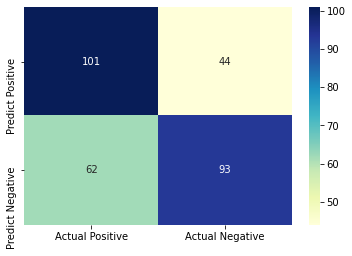

In [40]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.70      0.66       145
           1       0.68      0.60      0.64       155

    accuracy                           0.65       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.65      0.65      0.65       300



## Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=999)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred2 = clf.predict(X_test)

In [43]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))

Model accuracy score: 0.6067


In [44]:
y_pred_train2 = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train2)))

Training-set accuracy score: 0.6543


### Visualize Decision Tree

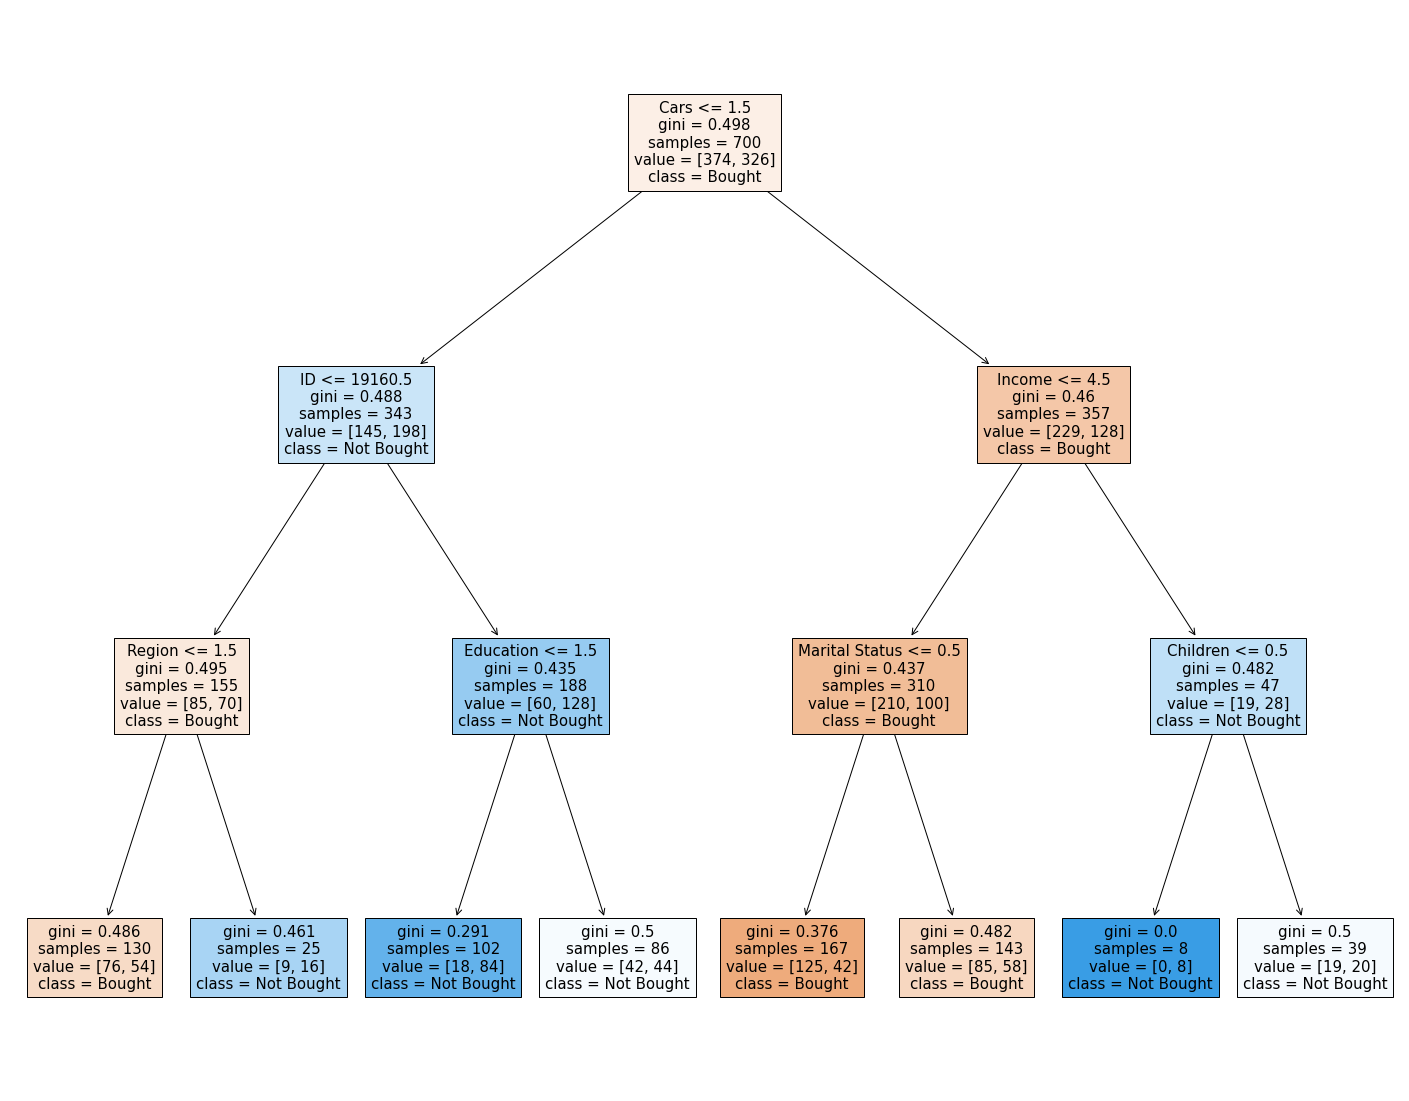

In [45]:
from sklearn import tree

fn=['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age']
cn=['Bought', 'Not Bought']

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names = fn, 
               class_names=cn, filled=True)

### Improving Accuracy using Grid Search

In [46]:
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
grid_values = {'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 
               'max_depth':[4,5,6,7,8,9,10], 'min_samples_split': [2,3,4]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4]})

In [47]:
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))

#Confusion matrix
cm = confusion_matrix(y_test,y_pred_acc)
print(cm)

Accuracy Score : 0.6033333333333334
[[98 47]
 [72 83]]


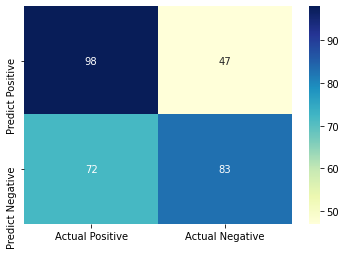

In [48]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.57      0.72      0.64       145
           1       0.66      0.50      0.57       155

    accuracy                           0.61       300
   macro avg       0.62      0.61      0.60       300
weighted avg       0.62      0.61      0.60       300



## Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train) 
result = model.score(X_test, y_test)

print('Model accuracy score: {0:0.4f}'. format(result))

Model accuracy score: 0.7100


In [51]:
from sklearn.metrics import make_scorer, accuracy_score

rfc = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Run the grid search
grid_obj = GridSearchCV(rfc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rfc = grid_obj.best_estimator_

# Fit the best algorithm to the data
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=5,
                       n_estimators=6)

In [52]:
y_pred4 = grid_clf_acc.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred4)))

Model accuracy score: 0.6033


## XGBoost Classifier

In [56]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7100


# Conclusion

In this project, I have analysed the Bike Buyers dataset and performed Binary Classification using various Supervised Learning Classification algorithms. The accuracy is fairly small due the the limitations of the dataset.